In [1]:
import mne 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy.stats import pearsonr

from sklearn.preprocessing import MinMaxScaler

from feature_extraction import *
from pre_processing import *
from plotting import *
from machine_learning import *
from post_processing import *

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go

In [2]:
#fname = 'main_learning_df_npc05_iqr.csv'
fname = 'main_learning_df_npc00_full_10post_iqr.csv'
ref_npc00 = pd.read_csv(fname)
ref_npc00

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,0.000009,0.000010,0.000006,0.000026,5.756294e-08,0.000026,5.208090e-12,0.191276,...,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.604202,2.375337,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,6.763491e-09,0.000015,2.228358e-12,0.119239,...,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.611754,2.797425,0,aaq,6.0
2,1,FP2-F8,0.000010,0.000011,0.000007,0.000030,5.756294e-08,0.000030,9.065146e-12,0.240700,...,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.607588,2.342041,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,5.936370e-09,0.000014,1.232138e-12,0.115955,...,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.606109,2.696113,0,aaq,6.0
4,2,FP2-F8,0.000010,0.000010,0.000006,0.000030,5.756294e-08,0.000030,4.393930e-11,0.266820,...,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.605147,2.392857,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,7.704703e-09,0.000033,6.842686e-12,0.124992,...,0.010545,3.889102e-13,0.007104,1.233815e-12,0.022537,0.598881,3.037407,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000019,0.000071,5.023759e-08,0.000071,5.815164e-12,0.326660,...,0.002544,1.702840e-13,0.000239,1.970360e-13,0.000277,0.598881,3.178054,0,P9,1.0
33085,74,T8-F8,0.000009,0.000012,0.000011,0.000050,5.023759e-08,0.000050,1.212774e-11,0.196806,...,0.003705,1.632194e-13,0.002649,7.042499e-13,0.011428,0.600593,3.178054,0,P9,1.0
33086,75,Fp2-F8,0.000017,0.000022,0.000017,0.000065,7.704703e-09,0.000065,5.815164e-12,0.290065,...,0.003705,1.581241e-13,0.000415,2.564985e-13,0.000673,0.598881,3.178054,0,P9,1.0


In [13]:
red_names = [i for i in ref.columns if 'amp' not in i]

In [25]:
ref_red_npc00 = ref_npc00[red_names]
ref_red_npc00

,epoch,channel,abs_psd_delta,rel_psd_delta,abs_psd_theta,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,5.208090e-12,0.191276,1.079195e-12,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.604202,2.375337,0,aaq,6.0
1,0,T4-F8,2.228358e-12,0.119239,8.880315e-13,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.611754,2.797425,0,aaq,6.0
2,1,FP2-F8,9.065146e-12,0.240700,8.923629e-13,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.607588,2.342041,0,aaq,6.0
3,1,T4-F8,1.232138e-12,0.115955,4.095194e-13,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.606109,2.696113,0,aaq,6.0
4,2,FP2-F8,4.393930e-11,0.266820,7.279812e-13,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.605147,2.392857,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,6.842686e-12,0.124992,5.773065e-13,0.010545,3.889102e-13,0.007104,1.233815e-12,0.022537,0.598881,3.037407,0,P9,1.0
33084,74,Fp2-F8,5.815164e-12,0.326660,1.808565e-12,0.002544,1.702840e-13,0.000239,1.970360e-13,0.000277,0.598881,3.178054,0,P9,1.0
33085,74,T8-F8,1.212774e-11,0.196806,1.906819e-12,0.003705,1.632194e-13,0.002649,7.042499e-13,0.011428,0.600593,3.178054,0,P9,1.0
33086,75,Fp2-F8,5.815164e-12,0.290065,4.815102e-13,0.003705,1.581241e-13,0.000415,2.564985e-13,0.000673,0.598881,3.178054,0,P9,1.0


#######################
Test Subjects: ['P1', 'P7', 'P16', 'P2', 'arq', 'aaq']
#######################
Fitting 5 folds for each of 8 candidates, totalling 40 fits
|   iter    |  target   |     C     |
-------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     14530
           1       0.40      0.57      0.47      1010

    accuracy                           0.92     15540
   macro avg       0.68      0.75      0.71     15540
weighted avg       0.93      0.92      0.92     15540



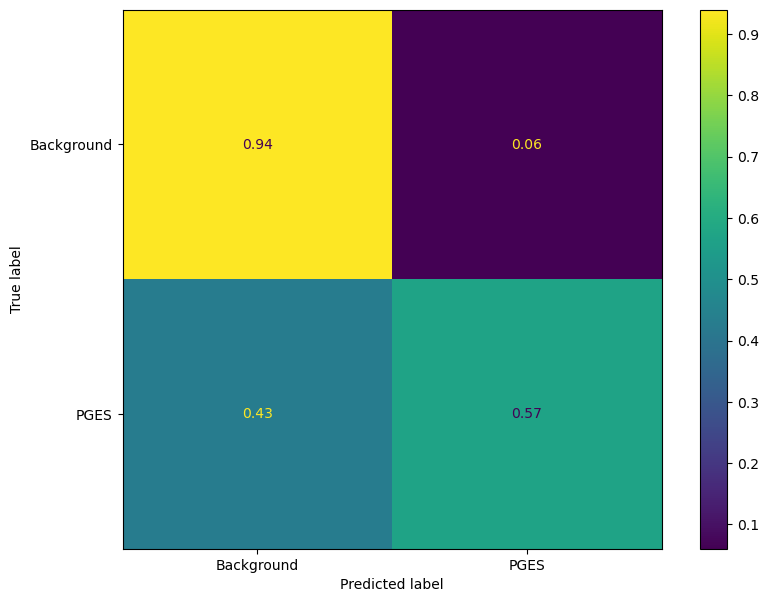

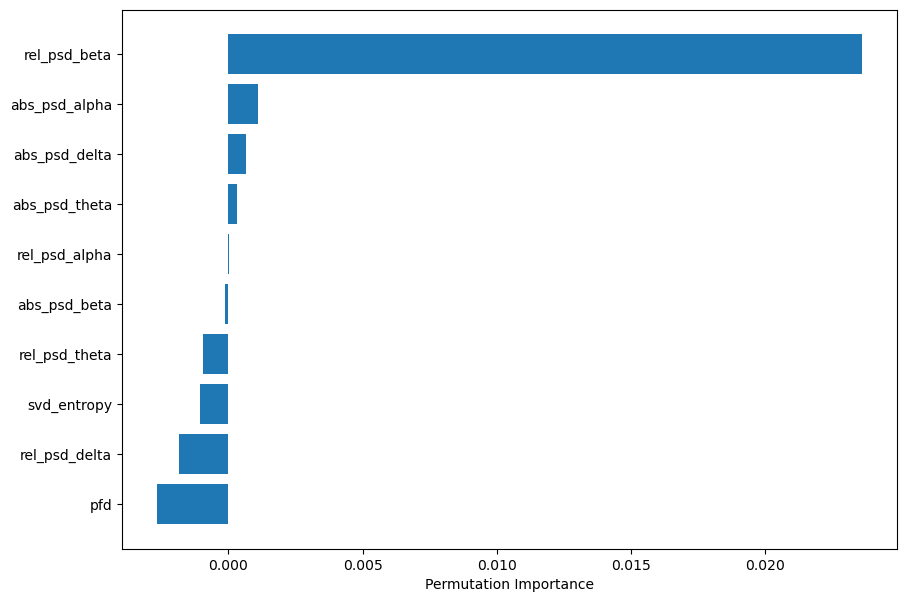

In [15]:
svc_npc00_ref, data_dict_npc00_ref, sub_test = machine_learning().make_optimized_svc(df = ref_red_npc00, 
                                                                 cm_path = 'cm_red_feats.png', 
                                                                 importance_path = 'svc_red_feats_importance.png')

In [23]:
fname = 'main_learning_df_npc05_full_10post_iqr.csv'
#fname = 'main_learning_df_npc00_full_10post_iqr.csv'
ref_npc05 = pd.read_csv(fname)
ref_npc05

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,0.000010,0.000012,0.000008,0.000039,5.756294e-08,0.000039,5.208090e-12,0.191276,...,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.572131,2.980348,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,1.320511e-08,0.000015,2.228358e-12,0.119239,...,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.588324,2.843461,0,aaq,6.0
2,1,FP2-F8,0.000011,0.000013,0.000009,0.000039,5.756294e-08,0.000039,9.065146e-12,0.240700,...,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.570482,2.927169,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,5.936370e-09,0.000014,1.232138e-12,0.115955,...,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.584734,2.746958,0,aaq,6.0
4,2,FP2-F8,0.000012,0.000013,0.000008,0.000035,5.756294e-08,0.000035,4.393930e-11,0.266820,...,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.570482,2.948485,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,7.704703e-09,0.000033,6.842686e-12,0.124992,...,0.010545,3.889102e-13,0.007104,1.233815e-12,0.022537,0.592572,3.048557,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000020,0.000071,5.023759e-08,0.000071,5.815164e-12,0.326660,...,0.002544,1.702840e-13,0.000239,1.970360e-13,0.000277,0.571892,3.195773,0,P9,1.0
33085,74,T8-F8,0.000010,0.000012,0.000010,0.000050,7.736106e-08,0.000050,1.212774e-11,0.196806,...,0.003705,1.632194e-13,0.002649,7.042499e-13,0.011428,0.594458,3.195773,0,P9,1.0
33086,75,Fp2-F8,0.000016,0.000022,0.000018,0.000071,7.704703e-09,0.000071,5.815164e-12,0.290065,...,0.003705,1.581241e-13,0.000415,2.564985e-13,0.000673,0.576138,3.195773,0,P9,1.0


In [26]:
ref_red_npc05 = ref_npc05[red_names]
ref_red_npc05

,epoch,channel,abs_psd_delta,rel_psd_delta,abs_psd_theta,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,5.208090e-12,0.191276,1.079195e-12,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.572131,2.980348,0,aaq,6.0
1,0,T4-F8,2.228358e-12,0.119239,8.880315e-13,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.588324,2.843461,0,aaq,6.0
2,1,FP2-F8,9.065146e-12,0.240700,8.923629e-13,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.570482,2.927169,0,aaq,6.0
3,1,T4-F8,1.232138e-12,0.115955,4.095194e-13,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.584734,2.746958,0,aaq,6.0
4,2,FP2-F8,4.393930e-11,0.266820,7.279812e-13,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.570482,2.948485,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,6.842686e-12,0.124992,5.773065e-13,0.010545,3.889102e-13,0.007104,1.233815e-12,0.022537,0.592572,3.048557,0,P9,1.0
33084,74,Fp2-F8,5.815164e-12,0.326660,1.808565e-12,0.002544,1.702840e-13,0.000239,1.970360e-13,0.000277,0.571892,3.195773,0,P9,1.0
33085,74,T8-F8,1.212774e-11,0.196806,1.906819e-12,0.003705,1.632194e-13,0.002649,7.042499e-13,0.011428,0.594458,3.195773,0,P9,1.0
33086,75,Fp2-F8,5.815164e-12,0.290065,4.815102e-13,0.003705,1.581241e-13,0.000415,2.564985e-13,0.000673,0.576138,3.195773,0,P9,1.0


#######################
Test Subjects: ['P1', 'P7', 'P16', 'P2', 'arq', 'aaq']
#######################
Fitting 5 folds for each of 8 candidates, totalling 40 fits
|   iter    |  target   |     C     |
-------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14530
           1       0.61      0.29      0.39      1010

    accuracy                           0.94     15540
   macro avg       0.78      0.64      0.68     15540
weighted avg       0.93      0.94      0.93     15540



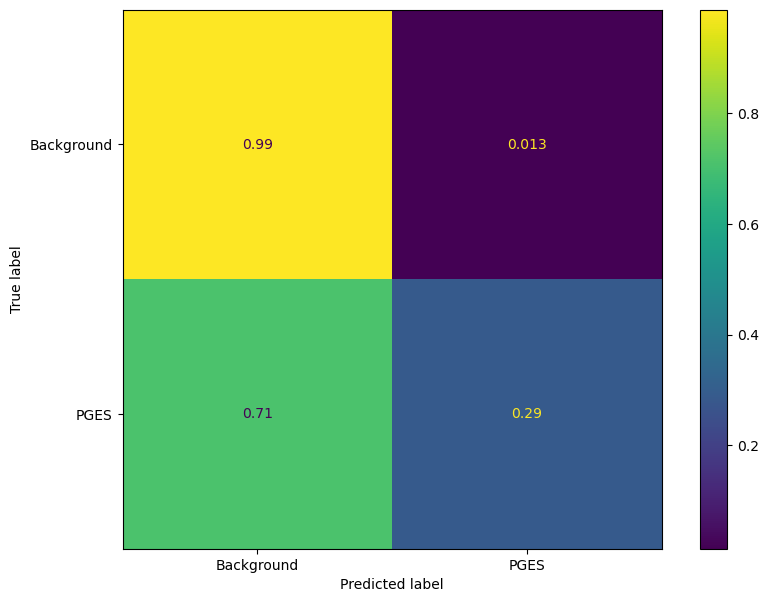

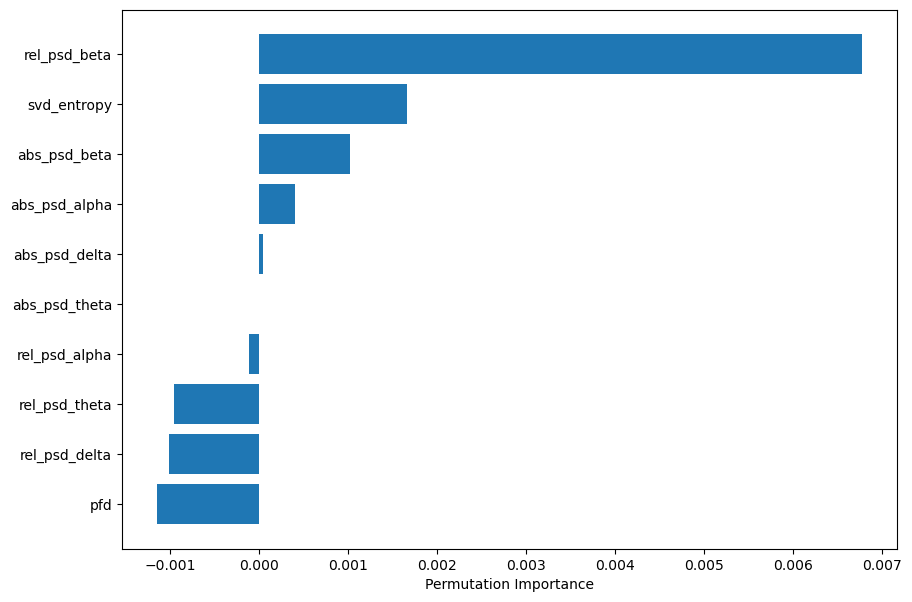

In [27]:
svc_npc05_ref, data_dict_npc05_ref, sub_test = machine_learning().make_optimized_svc(df = ref_red_npc05, 
                                                                 cm_path = 'cm_red_feats_npc05.png', 
                                                                 importance_path = 'svc_red_feats_importance_npc05.png')

In [29]:
pkl.dump(svc_npc00_ref, open('svc_npc00_red_feats.pkl', 'wb'))
pkl.dump(svc_npc05_ref, open('svc_npc05_red_feats.pkl', 'wb'))

# Test on the new data

In [30]:
df = pd.read_csv('main_learning_df_val_data_iqr.csv')
df

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,Fp2-F8,0.000004,0.000005,0.000004,0.000020,2.644489e-08,0.000020,6.777398e-12,0.154005,...,0.048528,6.915946e-13,0.015715,4.132227e-13,0.009390,0.604202,3.152387,0,10,1
1,0,T8-F8,0.000004,0.000006,0.000005,0.000029,2.644489e-08,0.000029,1.430437e-11,0.135915,...,0.021991,2.193711e-12,0.020844,5.670560e-13,0.005388,0.602365,3.147823,0,10,1
2,1,Fp2-F8,0.000004,0.000004,0.000003,0.000021,2.644489e-08,0.000021,1.267215e-12,0.047744,...,0.021991,5.720618e-13,0.021553,4.264180e-13,0.016066,0.612299,3.224458,0,10,1
3,1,T8-F8,0.000004,0.000005,0.000004,0.000022,2.644489e-08,0.000022,6.944470e-13,0.033195,...,0.012908,4.300118e-13,0.020555,7.021035e-13,0.033561,0.598881,3.283837,0,10,1
4,2,Fp2-F8,0.000004,0.000005,0.000003,0.000021,2.644489e-08,0.000021,3.924381e-12,0.132804,...,0.035090,3.291690e-13,0.011139,5.162434e-13,0.017470,0.605626,3.211713,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38311,43,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.361800e-12,0.175617,...,0.014400,3.176139e-13,0.007154,1.208165e-13,0.015953,0.650698,3.056865,0,15,2
38312,44,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.089951e-12,0.047464,...,0.039003,5.419325e-13,0.023600,1.208165e-13,0.024866,0.650698,3.223789,0,15,2
38313,44,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.388377e-12,0.067745,...,0.046326,6.094300e-13,0.029737,1.208165e-13,0.019066,0.650698,3.179301,0,15,2
38314,45,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,2.304743e-12,0.071184,...,0.012134,5.604659e-13,0.017310,1.208165e-13,0.009539,0.650698,3.170431,0,15,2


In [31]:
df_red = df[red_names]
df_red

,epoch,channel,abs_psd_delta,rel_psd_delta,abs_psd_theta,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,Fp2-F8,6.777398e-12,0.154005,2.135587e-12,0.048528,6.915946e-13,0.015715,4.132227e-13,0.009390,0.604202,3.152387,0,10,1
1,0,T8-F8,1.430437e-11,0.135915,7.974144e-13,0.021991,2.193711e-12,0.020844,5.670560e-13,0.005388,0.602365,3.147823,0,10,1
2,1,Fp2-F8,1.267215e-12,0.047744,1.958760e-12,0.021991,5.720618e-13,0.021553,4.264180e-13,0.016066,0.612299,3.224458,0,10,1
3,1,T8-F8,6.944470e-13,0.033195,2.700280e-13,0.012908,4.300118e-13,0.020555,7.021035e-13,0.033561,0.598881,3.283837,0,10,1
4,2,Fp2-F8,3.924381e-12,0.132804,1.036914e-12,0.035090,3.291690e-13,0.011139,5.162434e-13,0.017470,0.605626,3.211713,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38311,43,T8-F8,1.361800e-12,0.175617,6.393518e-13,0.014400,3.176139e-13,0.007154,1.208165e-13,0.015953,0.650698,3.056865,0,15,2
38312,44,Fp2-F8,1.089951e-12,0.047464,8.956550e-13,0.039003,5.419325e-13,0.023600,1.208165e-13,0.024866,0.650698,3.223789,0,15,2
38313,44,T8-F8,1.388377e-12,0.067745,9.494103e-13,0.046326,6.094300e-13,0.029737,1.208165e-13,0.019066,0.650698,3.179301,0,15,2
38314,45,Fp2-F8,2.304743e-12,0.071184,3.928794e-13,0.012134,5.604659e-13,0.017310,1.208165e-13,0.009539,0.650698,3.170431,0,15,2


              precision    recall  f1-score   support

           0       1.00      0.70      0.82     38088
           1       0.01      0.45      0.02       228

    accuracy                           0.70     38316
   macro avg       0.50      0.57      0.42     38316
weighted avg       0.99      0.70      0.81     38316



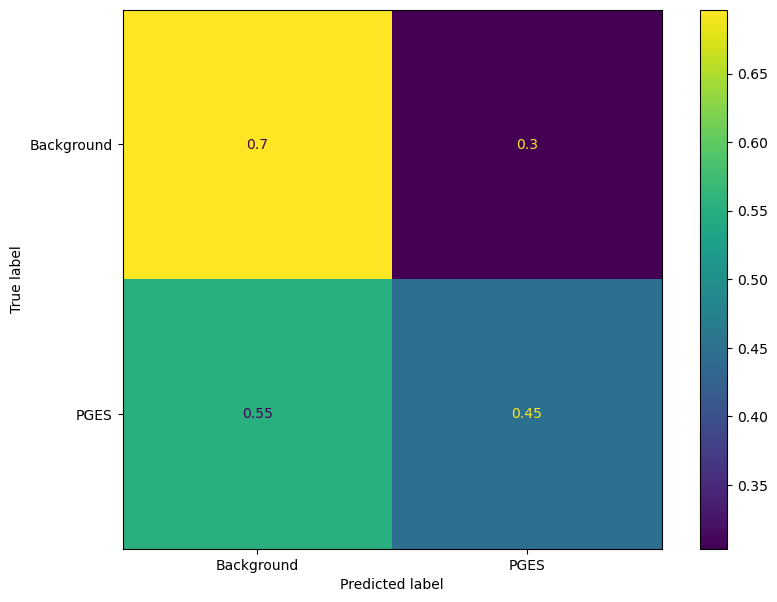

In [32]:
x = MinMaxScaler().fit_transform(df_red.iloc[:, 2:12])
y = df_red.pges
machine_learning().evaluate_classifier(clf = svc_npc00_ref, x = x, y = y, save_path = 'cm_val_npc00.png')

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     38088
           1       0.01      0.28      0.02       228

    accuracy                           0.84     38316
   macro avg       0.50      0.56      0.47     38316
weighted avg       0.99      0.84      0.91     38316



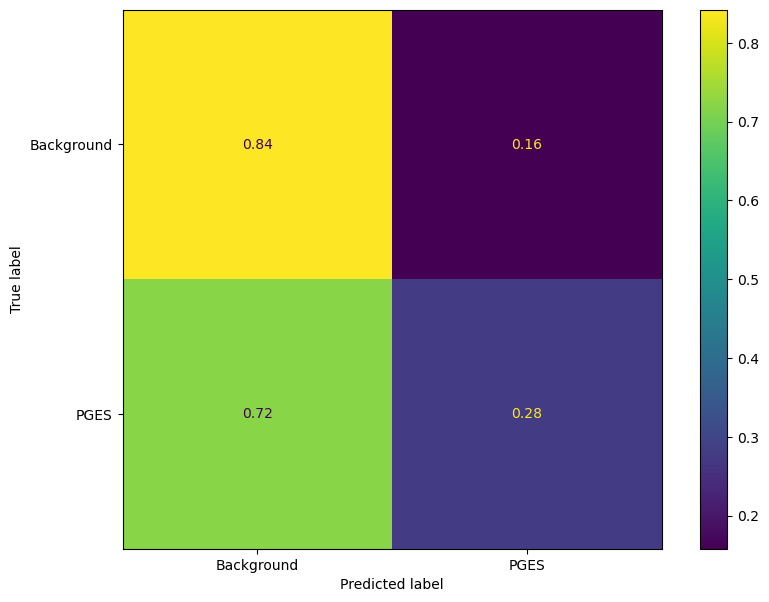

In [33]:
machine_learning().evaluate_classifier(clf = svc_npc05_ref, x = x, y = y, save_path = 'cm_val_npc05.png')

# TEST TO SEE WHETHER THE MIN/MAX/RANGE ETC IS BETTER THAN PSD ETC

In [3]:
#fname = 'main_learning_df_npc05_iqr.csv'
fname = 'main_learning_df_npc00_full_10post_iqr.csv'
ref_npc00 = pd.read_csv(fname)
ref_npc00

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,0.000009,0.000010,0.000006,0.000026,5.756294e-08,0.000026,5.208090e-12,0.191276,...,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.604202,2.375337,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,6.763491e-09,0.000015,2.228358e-12,0.119239,...,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.611754,2.797425,0,aaq,6.0
2,1,FP2-F8,0.000010,0.000011,0.000007,0.000030,5.756294e-08,0.000030,9.065146e-12,0.240700,...,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.607588,2.342041,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,5.936370e-09,0.000014,1.232138e-12,0.115955,...,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.606109,2.696113,0,aaq,6.0
4,2,FP2-F8,0.000010,0.000010,0.000006,0.000030,5.756294e-08,0.000030,4.393930e-11,0.266820,...,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.605147,2.392857,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,7.704703e-09,0.000033,6.842686e-12,0.124992,...,0.010545,3.889102e-13,0.007104,1.233815e-12,0.022537,0.598881,3.037407,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000019,0.000071,5.023759e-08,0.000071,5.815164e-12,0.326660,...,0.002544,1.702840e-13,0.000239,1.970360e-13,0.000277,0.598881,3.178054,0,P9,1.0
33085,74,T8-F8,0.000009,0.000012,0.000011,0.000050,5.023759e-08,0.000050,1.212774e-11,0.196806,...,0.003705,1.632194e-13,0.002649,7.042499e-13,0.011428,0.600593,3.178054,0,P9,1.0
33086,75,Fp2-F8,0.000017,0.000022,0.000017,0.000065,7.704703e-09,0.000065,5.815164e-12,0.290065,...,0.003705,1.581241e-13,0.000415,2.564985e-13,0.000673,0.598881,3.178054,0,P9,1.0


In [7]:
red_names = [i for i in ref_npc00.columns if ('amp' in i) or (i in ['epoch', 'channel', 'pges', 'subject', 'session'])]

In [9]:
ref_red_npc00 = ref_npc00[red_names]
ref_red_npc00

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,pges,subject,session
0,0,FP2-F8,0.000009,0.000010,0.000006,0.000026,5.756294e-08,0.000026,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,6.763491e-09,0.000015,0,aaq,6.0
2,1,FP2-F8,0.000010,0.000011,0.000007,0.000030,5.756294e-08,0.000030,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,5.936370e-09,0.000014,0,aaq,6.0
4,2,FP2-F8,0.000010,0.000010,0.000006,0.000030,5.756294e-08,0.000030,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,7.704703e-09,0.000033,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000019,0.000071,5.023759e-08,0.000071,0,P9,1.0
33085,74,T8-F8,0.000009,0.000012,0.000011,0.000050,5.023759e-08,0.000050,0,P9,1.0
33086,75,Fp2-F8,0.000017,0.000022,0.000017,0.000065,7.704703e-09,0.000065,0,P9,1.0


#######################
Test Subjects: ['P1', 'P7', 'P16', 'P2', 'arq', 'aaq']
#######################
Fitting 5 folds for each of 8 candidates, totalling 40 fits
|   iter    |  target   |     C     |
-------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.62      0.76     14530
           1       0.12      0.78      0.21      1010

    accuracy                           0.63     15540
   macro avg       0.55      0.70      0.48     15540
weighted avg       0.92      0.63      0.72     15540



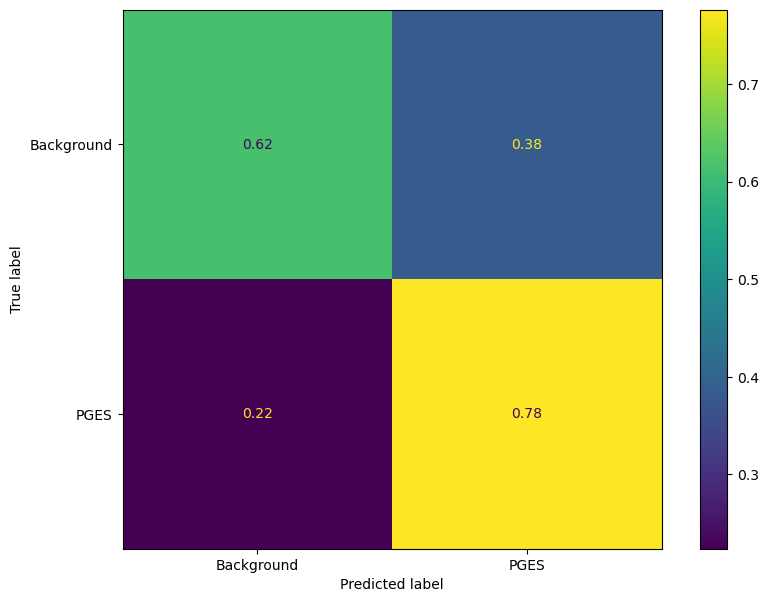

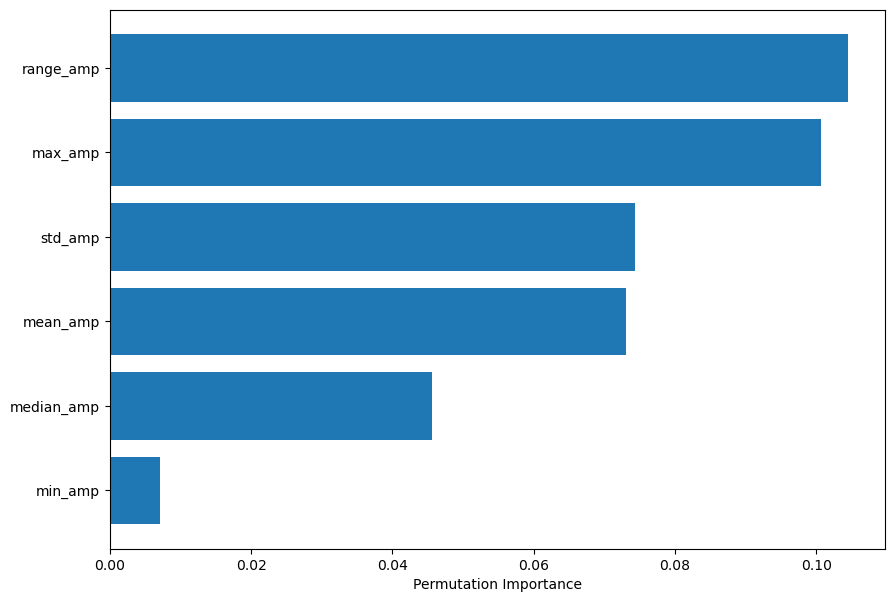

In [11]:
svc_npc00_ref, data_dict_npc00_ref, sub_test = machine_learning().make_optimized_svc(df = ref_red_npc00, 
                                                                 cm_path = 'cm_red_feats_npc00_amp.png', 
                                                                 importance_path = 'svc_red_feats_importance_npc00_amp.png')

In [12]:
fname = 'main_learning_df_npc05_full_10post_iqr.csv'
#fname = 'main_learning_df_npc00_full_10post_iqr.csv'
ref_npc05 = pd.read_csv(fname)
ref_npc05

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,0.000010,0.000012,0.000008,0.000039,5.756294e-08,0.000039,5.208090e-12,0.191276,...,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.572131,2.980348,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,1.320511e-08,0.000015,2.228358e-12,0.119239,...,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.588324,2.843461,0,aaq,6.0
2,1,FP2-F8,0.000011,0.000013,0.000009,0.000039,5.756294e-08,0.000039,9.065146e-12,0.240700,...,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.570482,2.927169,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,5.936370e-09,0.000014,1.232138e-12,0.115955,...,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.584734,2.746958,0,aaq,6.0
4,2,FP2-F8,0.000012,0.000013,0.000008,0.000035,5.756294e-08,0.000035,4.393930e-11,0.266820,...,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.570482,2.948485,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,7.704703e-09,0.000033,6.842686e-12,0.124992,...,0.010545,3.889102e-13,0.007104,1.233815e-12,0.022537,0.592572,3.048557,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000020,0.000071,5.023759e-08,0.000071,5.815164e-12,0.326660,...,0.002544,1.702840e-13,0.000239,1.970360e-13,0.000277,0.571892,3.195773,0,P9,1.0
33085,74,T8-F8,0.000010,0.000012,0.000010,0.000050,7.736106e-08,0.000050,1.212774e-11,0.196806,...,0.003705,1.632194e-13,0.002649,7.042499e-13,0.011428,0.594458,3.195773,0,P9,1.0
33086,75,Fp2-F8,0.000016,0.000022,0.000018,0.000071,7.704703e-09,0.000071,5.815164e-12,0.290065,...,0.003705,1.581241e-13,0.000415,2.564985e-13,0.000673,0.576138,3.195773,0,P9,1.0


In [13]:
ref_red_npc05 = ref_npc05[red_names]
ref_red_npc05

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,pges,subject,session
0,0,FP2-F8,0.000010,0.000012,0.000008,0.000039,5.756294e-08,0.000039,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,1.320511e-08,0.000015,0,aaq,6.0
2,1,FP2-F8,0.000011,0.000013,0.000009,0.000039,5.756294e-08,0.000039,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,5.936370e-09,0.000014,0,aaq,6.0
4,2,FP2-F8,0.000012,0.000013,0.000008,0.000035,5.756294e-08,0.000035,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,7.704703e-09,0.000033,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000020,0.000071,5.023759e-08,0.000071,0,P9,1.0
33085,74,T8-F8,0.000010,0.000012,0.000010,0.000050,7.736106e-08,0.000050,0,P9,1.0
33086,75,Fp2-F8,0.000016,0.000022,0.000018,0.000071,7.704703e-09,0.000071,0,P9,1.0


#######################
Test Subjects: ['P1', 'P7', 'P16', 'P2', 'arq', 'aaq']
#######################
Fitting 5 folds for each of 8 candidates, totalling 40 fits
|   iter    |  target   |     C     |
-------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.36      0.53     14530
           1       0.09      0.87      0.16      1010

    accuracy                           0.39     15540
   macro avg       0.53      0.62      0.34     15540
weighted avg       0.92      0.39      0.50     15540



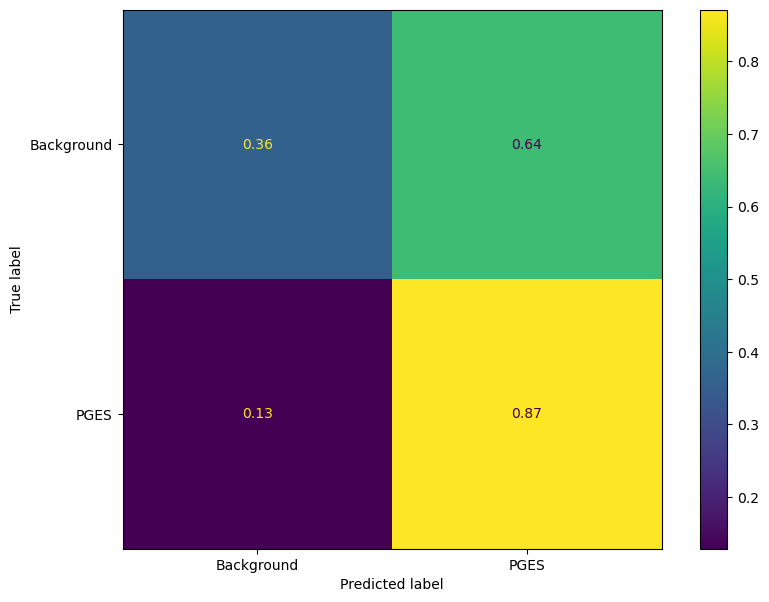

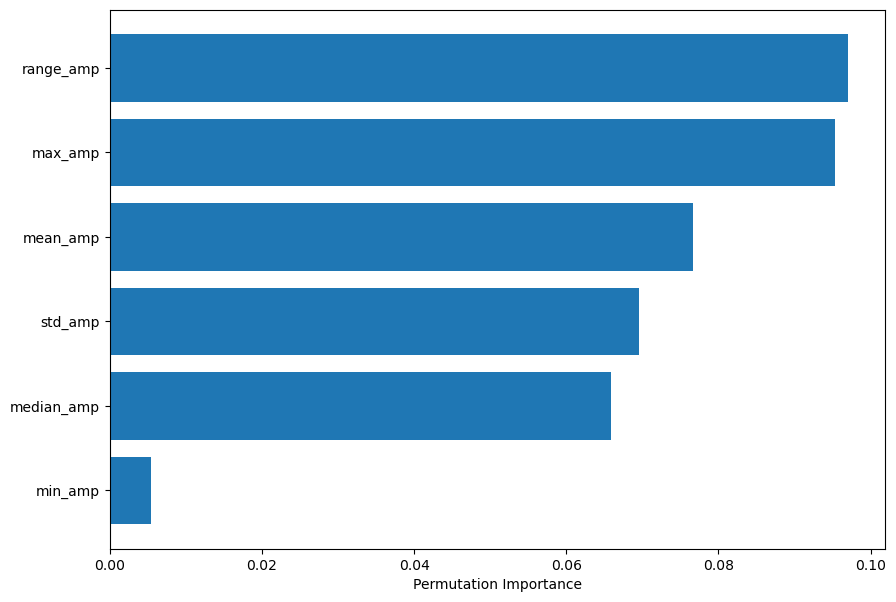

In [14]:
svc_npc05_ref, data_dict_npc05_ref, sub_test = machine_learning().make_optimized_svc(df = ref_red_npc05, 
                                                                 cm_path = 'cm_red_feats_npc05_amp.png', 
                                                                 importance_path = 'svc_red_feats_importance_npc05_amp.png')

In [15]:
pkl.dump(svc_npc00_ref, open('svc_npc00_red_feats_amp.pkl', 'wb'))
pkl.dump(svc_npc05_ref, open('svc_npc05_red_feats_amp.pkl', 'wb'))

# Test on the new data

In [16]:
df = pd.read_csv('main_learning_df_val_data_iqr.csv')
df

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,Fp2-F8,0.000004,0.000005,0.000004,0.000020,2.644489e-08,0.000020,6.777398e-12,0.154005,...,0.048528,6.915946e-13,0.015715,4.132227e-13,0.009390,0.604202,3.152387,0,10,1
1,0,T8-F8,0.000004,0.000006,0.000005,0.000029,2.644489e-08,0.000029,1.430437e-11,0.135915,...,0.021991,2.193711e-12,0.020844,5.670560e-13,0.005388,0.602365,3.147823,0,10,1
2,1,Fp2-F8,0.000004,0.000004,0.000003,0.000021,2.644489e-08,0.000021,1.267215e-12,0.047744,...,0.021991,5.720618e-13,0.021553,4.264180e-13,0.016066,0.612299,3.224458,0,10,1
3,1,T8-F8,0.000004,0.000005,0.000004,0.000022,2.644489e-08,0.000022,6.944470e-13,0.033195,...,0.012908,4.300118e-13,0.020555,7.021035e-13,0.033561,0.598881,3.283837,0,10,1
4,2,Fp2-F8,0.000004,0.000005,0.000003,0.000021,2.644489e-08,0.000021,3.924381e-12,0.132804,...,0.035090,3.291690e-13,0.011139,5.162434e-13,0.017470,0.605626,3.211713,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38311,43,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.361800e-12,0.175617,...,0.014400,3.176139e-13,0.007154,1.208165e-13,0.015953,0.650698,3.056865,0,15,2
38312,44,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.089951e-12,0.047464,...,0.039003,5.419325e-13,0.023600,1.208165e-13,0.024866,0.650698,3.223789,0,15,2
38313,44,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.388377e-12,0.067745,...,0.046326,6.094300e-13,0.029737,1.208165e-13,0.019066,0.650698,3.179301,0,15,2
38314,45,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,2.304743e-12,0.071184,...,0.012134,5.604659e-13,0.017310,1.208165e-13,0.009539,0.650698,3.170431,0,15,2


In [17]:
df_red = df[red_names]
df_red

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,pges,subject,session
0,0,Fp2-F8,0.000004,0.000005,0.000004,0.000020,2.644489e-08,0.000020,0,10,1
1,0,T8-F8,0.000004,0.000006,0.000005,0.000029,2.644489e-08,0.000029,0,10,1
2,1,Fp2-F8,0.000004,0.000004,0.000003,0.000021,2.644489e-08,0.000021,0,10,1
3,1,T8-F8,0.000004,0.000005,0.000004,0.000022,2.644489e-08,0.000022,0,10,1
4,2,Fp2-F8,0.000004,0.000005,0.000003,0.000021,2.644489e-08,0.000021,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...
38311,43,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,0,15,2
38312,44,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,0,15,2
38313,44,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,0,15,2
38314,45,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,0,15,2


              precision    recall  f1-score   support

           0       1.00      0.46      0.63     38088
           1       0.01      0.81      0.02       228

    accuracy                           0.46     38316
   macro avg       0.50      0.64      0.32     38316
weighted avg       0.99      0.46      0.63     38316



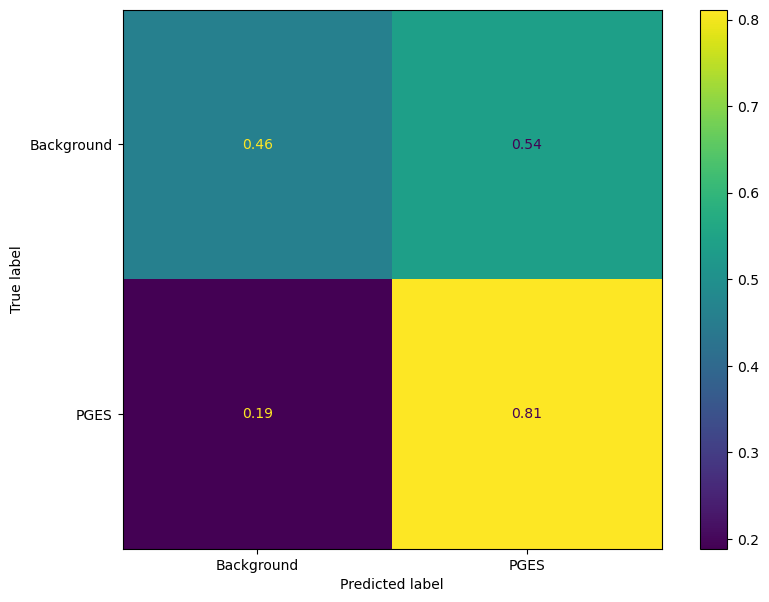

In [18]:
x = MinMaxScaler().fit_transform(df_red.iloc[:, 2:8])
y = df_red.pges
machine_learning().evaluate_classifier(clf = svc_npc00_ref, x = x, y = y, save_path = 'cm_val_npc00_amp.png')

              precision    recall  f1-score   support

           0       1.00      0.30      0.46     38088
           1       0.01      1.00      0.02       228

    accuracy                           0.31     38316
   macro avg       0.50      0.65      0.24     38316
weighted avg       0.99      0.31      0.46     38316



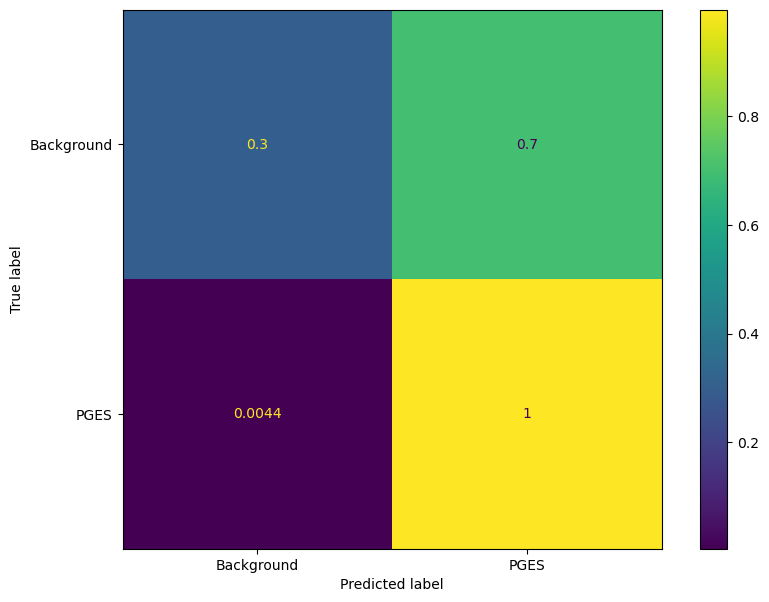

In [19]:
machine_learning().evaluate_classifier(clf = svc_npc05_ref, x = x, y = y, save_path = 'cm_val_npc05_amp.png')

# Interesting results. Final investigation is: no noise, no min amp, amp vars, svd entropy and rel psd beta

In [20]:
#fname = 'main_learning_df_npc05_iqr.csv'
fname = 'main_learning_df_npc00_full_10post_iqr.csv'
ref_npc00 = pd.read_csv(fname)
ref_npc00

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,0.000009,0.000010,0.000006,0.000026,5.756294e-08,0.000026,5.208090e-12,0.191276,...,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.604202,2.375337,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,6.763491e-09,0.000015,2.228358e-12,0.119239,...,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.611754,2.797425,0,aaq,6.0
2,1,FP2-F8,0.000010,0.000011,0.000007,0.000030,5.756294e-08,0.000030,9.065146e-12,0.240700,...,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.607588,2.342041,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,5.936370e-09,0.000014,1.232138e-12,0.115955,...,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.606109,2.696113,0,aaq,6.0
4,2,FP2-F8,0.000010,0.000010,0.000006,0.000030,5.756294e-08,0.000030,4.393930e-11,0.266820,...,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.605147,2.392857,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,7.704703e-09,0.000033,6.842686e-12,0.124992,...,0.010545,3.889102e-13,0.007104,1.233815e-12,0.022537,0.598881,3.037407,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000019,0.000071,5.023759e-08,0.000071,5.815164e-12,0.326660,...,0.002544,1.702840e-13,0.000239,1.970360e-13,0.000277,0.598881,3.178054,0,P9,1.0
33085,74,T8-F8,0.000009,0.000012,0.000011,0.000050,5.023759e-08,0.000050,1.212774e-11,0.196806,...,0.003705,1.632194e-13,0.002649,7.042499e-13,0.011428,0.600593,3.178054,0,P9,1.0
33086,75,Fp2-F8,0.000017,0.000022,0.000017,0.000065,7.704703e-09,0.000065,5.815164e-12,0.290065,...,0.003705,1.581241e-13,0.000415,2.564985e-13,0.000673,0.598881,3.178054,0,P9,1.0


In [21]:
ref_npc00.columns

Index(['epoch', 'channel', 'median_amp', 'mean_amp', 'std_amp', 'max_amp',
       'min_amp', 'range_amp', 'abs_psd_delta', 'rel_psd_delta',
       'abs_psd_theta', 'rel_psd_theta', 'abs_psd_alpha', 'rel_psd_alpha',
       'abs_psd_beta', 'rel_psd_beta', 'pfd', 'svd_entropy', 'pges', 'subject',
       'session'],
      dtype='object')

In [24]:
red_names = ['epoch', 'channel', 'median_amp', 'mean_amp', 'std_amp', 
             'max_amp', 'range_amp', 'rel_psd_beta', 'svd_entropy', 'pges', 'subject', 'session']

In [25]:
ref_red_npc00 = ref_npc00[red_names]
ref_red_npc00

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,range_amp,rel_psd_beta,svd_entropy,pges,subject,session
0,0,FP2-F8,0.000009,0.000010,0.000006,0.000026,0.000026,0.005673,2.375337,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,0.000015,0.011267,2.797425,0,aaq,6.0
2,1,FP2-F8,0.000010,0.000011,0.000007,0.000030,0.000030,0.003519,2.342041,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,0.000014,0.012874,2.696113,0,aaq,6.0
4,2,FP2-F8,0.000010,0.000010,0.000006,0.000030,0.000030,0.000842,2.392857,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,0.000033,0.022537,3.037407,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000019,0.000071,0.000071,0.000277,3.178054,0,P9,1.0
33085,74,T8-F8,0.000009,0.000012,0.000011,0.000050,0.000050,0.011428,3.178054,0,P9,1.0
33086,75,Fp2-F8,0.000017,0.000022,0.000017,0.000065,0.000065,0.000673,3.178054,0,P9,1.0


#######################
Test Subjects: ['P1', 'P7', 'P16', 'P2', 'arq', 'aaq']
#######################
Fitting 5 folds for each of 8 candidates, totalling 40 fits
|   iter    |  target   |     C     |
-------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     14530
           1       0.45      0.51      0.48      1010

    accuracy                           0.93     15540
   macro avg       0.71      0.73      0.72     15540
weighted avg       0.93      0.93      0.93     15540



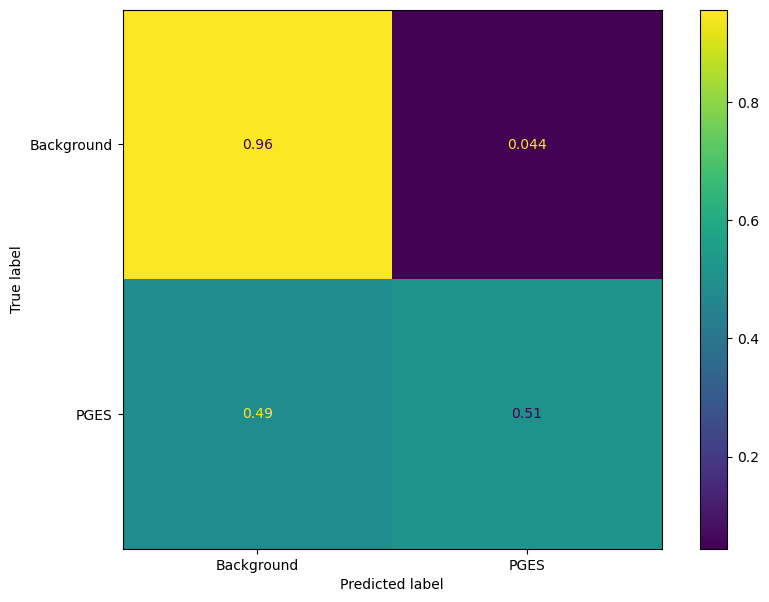

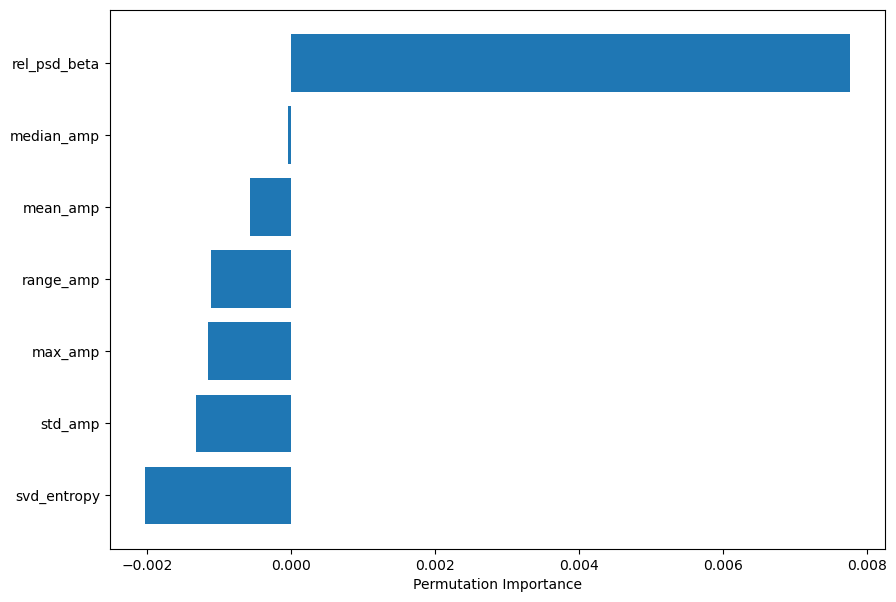

In [26]:
svc_npc00_ref, data_dict_npc00_ref, sub_test = machine_learning().make_optimized_svc(df = ref_red_npc00, 
                                                                 cm_path = 'cm_red_feats_npc00_mix.png', 
                                                                 importance_path = 'svc_red_feats_importance_npc00_amp_mix.png')

# No entropy

In [29]:
#fname = 'main_learning_df_npc05_iqr.csv'
fname = 'main_learning_df_npc00_full_10post_iqr.csv'
ref_npc00 = pd.read_csv(fname)
ref_npc00

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,0.000009,0.000010,0.000006,0.000026,5.756294e-08,0.000026,5.208090e-12,0.191276,...,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.604202,2.375337,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,6.763491e-09,0.000015,2.228358e-12,0.119239,...,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.611754,2.797425,0,aaq,6.0
2,1,FP2-F8,0.000010,0.000011,0.000007,0.000030,5.756294e-08,0.000030,9.065146e-12,0.240700,...,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.607588,2.342041,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,5.936370e-09,0.000014,1.232138e-12,0.115955,...,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.606109,2.696113,0,aaq,6.0
4,2,FP2-F8,0.000010,0.000010,0.000006,0.000030,5.756294e-08,0.000030,4.393930e-11,0.266820,...,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.605147,2.392857,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,7.704703e-09,0.000033,6.842686e-12,0.124992,...,0.010545,3.889102e-13,0.007104,1.233815e-12,0.022537,0.598881,3.037407,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000019,0.000071,5.023759e-08,0.000071,5.815164e-12,0.326660,...,0.002544,1.702840e-13,0.000239,1.970360e-13,0.000277,0.598881,3.178054,0,P9,1.0
33085,74,T8-F8,0.000009,0.000012,0.000011,0.000050,5.023759e-08,0.000050,1.212774e-11,0.196806,...,0.003705,1.632194e-13,0.002649,7.042499e-13,0.011428,0.600593,3.178054,0,P9,1.0
33086,75,Fp2-F8,0.000017,0.000022,0.000017,0.000065,7.704703e-09,0.000065,5.815164e-12,0.290065,...,0.003705,1.581241e-13,0.000415,2.564985e-13,0.000673,0.598881,3.178054,0,P9,1.0


In [30]:
red_names = ['epoch', 'channel', 'median_amp', 'mean_amp', 'std_amp', 
             'max_amp', 'range_amp', 'rel_psd_beta', 'pges', 'subject', 'session']

In [31]:
ref_red_npc00 = ref_npc00[red_names]
ref_red_npc00

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,range_amp,rel_psd_beta,pges,subject,session
0,0,FP2-F8,0.000009,0.000010,0.000006,0.000026,0.000026,0.005673,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,0.000015,0.011267,0,aaq,6.0
2,1,FP2-F8,0.000010,0.000011,0.000007,0.000030,0.000030,0.003519,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,0.000014,0.012874,0,aaq,6.0
4,2,FP2-F8,0.000010,0.000010,0.000006,0.000030,0.000030,0.000842,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,0.000033,0.022537,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000019,0.000071,0.000071,0.000277,0,P9,1.0
33085,74,T8-F8,0.000009,0.000012,0.000011,0.000050,0.000050,0.011428,0,P9,1.0
33086,75,Fp2-F8,0.000017,0.000022,0.000017,0.000065,0.000065,0.000673,0,P9,1.0


#######################
Test Subjects: ['P1', 'P7', 'P16', 'P2', 'arq', 'aaq']
#######################
Fitting 5 folds for each of 8 candidates, totalling 40 fits
|   iter    |  target   |     C     |
-------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     14530
           1       0.22      0.72      0.34      1010

    accuracy                           0.82     15540
   macro avg       0.60      0.77      0.62     15540
weighted avg       0.93      0.82      0.86     15540



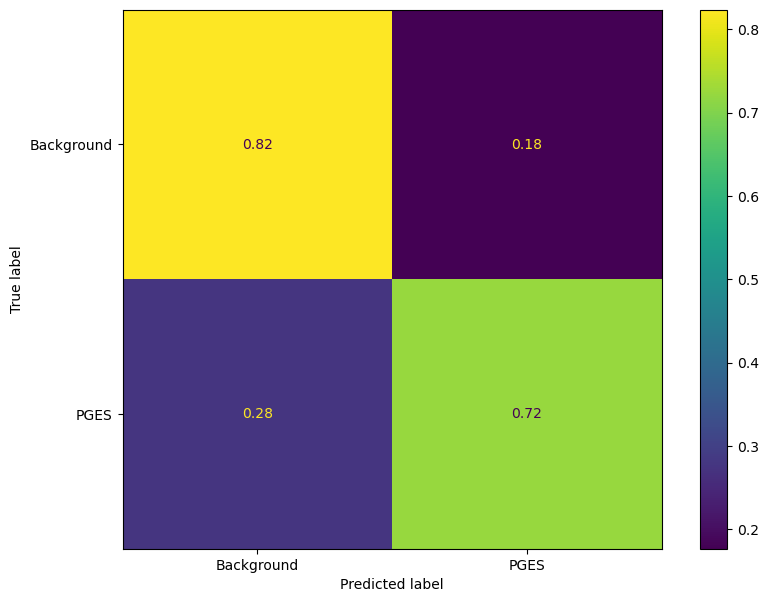

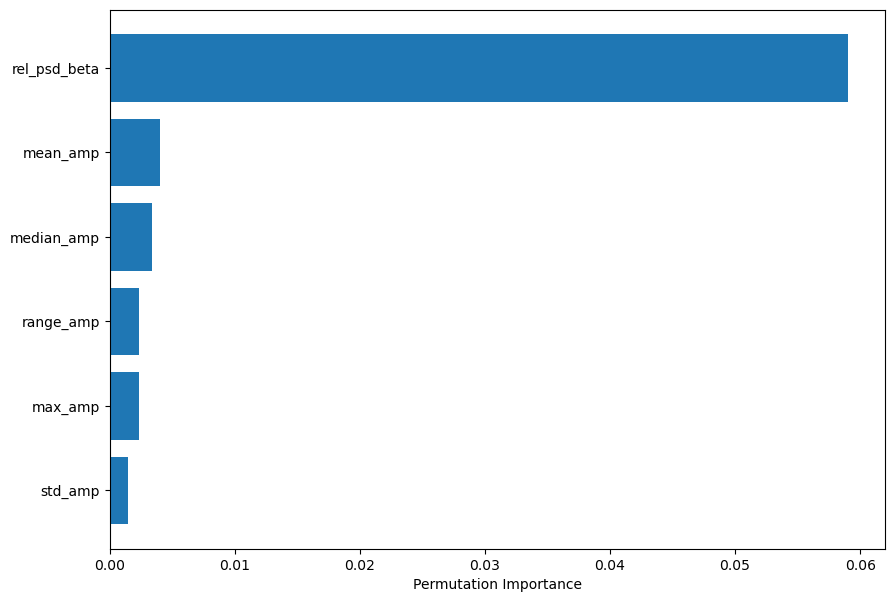

In [35]:
svc_npc00_ref, data_dict_npc00_ref, sub_test = machine_learning().make_optimized_svc(df = ref_red_npc00, 
                                                                 cm_path = 'cm_red_feats_npc00_mix.png', 
                                                                 importance_path = 'svc_red_feats_importance_npc00_amp_mix.png')

In [36]:
df = pd.read_csv('main_learning_df_val_data_iqr.csv')
df

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,Fp2-F8,0.000004,0.000005,0.000004,0.000020,2.644489e-08,0.000020,6.777398e-12,0.154005,...,0.048528,6.915946e-13,0.015715,4.132227e-13,0.009390,0.604202,3.152387,0,10,1
1,0,T8-F8,0.000004,0.000006,0.000005,0.000029,2.644489e-08,0.000029,1.430437e-11,0.135915,...,0.021991,2.193711e-12,0.020844,5.670560e-13,0.005388,0.602365,3.147823,0,10,1
2,1,Fp2-F8,0.000004,0.000004,0.000003,0.000021,2.644489e-08,0.000021,1.267215e-12,0.047744,...,0.021991,5.720618e-13,0.021553,4.264180e-13,0.016066,0.612299,3.224458,0,10,1
3,1,T8-F8,0.000004,0.000005,0.000004,0.000022,2.644489e-08,0.000022,6.944470e-13,0.033195,...,0.012908,4.300118e-13,0.020555,7.021035e-13,0.033561,0.598881,3.283837,0,10,1
4,2,Fp2-F8,0.000004,0.000005,0.000003,0.000021,2.644489e-08,0.000021,3.924381e-12,0.132804,...,0.035090,3.291690e-13,0.011139,5.162434e-13,0.017470,0.605626,3.211713,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38311,43,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.361800e-12,0.175617,...,0.014400,3.176139e-13,0.007154,1.208165e-13,0.015953,0.650698,3.056865,0,15,2
38312,44,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.089951e-12,0.047464,...,0.039003,5.419325e-13,0.023600,1.208165e-13,0.024866,0.650698,3.223789,0,15,2
38313,44,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.388377e-12,0.067745,...,0.046326,6.094300e-13,0.029737,1.208165e-13,0.019066,0.650698,3.179301,0,15,2
38314,45,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,2.304743e-12,0.071184,...,0.012134,5.604659e-13,0.017310,1.208165e-13,0.009539,0.650698,3.170431,0,15,2


In [37]:
df_red = df[red_names]
df_red

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,range_amp,rel_psd_beta,pges,subject,session
0,0,Fp2-F8,0.000004,0.000005,0.000004,0.000020,0.000020,0.009390,0,10,1
1,0,T8-F8,0.000004,0.000006,0.000005,0.000029,0.000029,0.005388,0,10,1
2,1,Fp2-F8,0.000004,0.000004,0.000003,0.000021,0.000021,0.016066,0,10,1
3,1,T8-F8,0.000004,0.000005,0.000004,0.000022,0.000022,0.033561,0,10,1
4,2,Fp2-F8,0.000004,0.000005,0.000003,0.000021,0.000021,0.017470,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...
38311,43,T8-F8,0.000003,0.000003,0.000002,0.000012,0.000012,0.015953,0,15,2
38312,44,Fp2-F8,0.000003,0.000003,0.000002,0.000012,0.000012,0.024866,0,15,2
38313,44,T8-F8,0.000003,0.000003,0.000002,0.000012,0.000012,0.019066,0,15,2
38314,45,Fp2-F8,0.000003,0.000003,0.000002,0.000012,0.000012,0.009539,0,15,2


              precision    recall  f1-score   support

           0       1.00      0.51      0.67     38088
           1       0.01      0.64      0.02       228

    accuracy                           0.51     38316
   macro avg       0.50      0.57      0.34     38316
weighted avg       0.99      0.51      0.67     38316



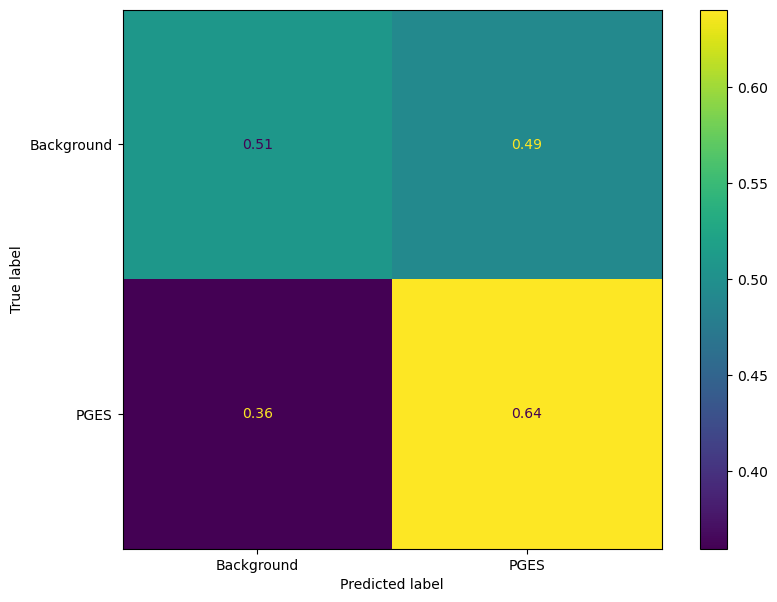

In [38]:
x = MinMaxScaler().fit_transform(df_red.iloc[:, 2:8])
y = df_red.pges
machine_learning().evaluate_classifier(clf = svc_npc00_ref, x = x, y = y, save_path = 'cm_val_npc00_amp_mix.png')

In [39]:
pkl.dump(svc_npc00_ref, open('svc_npc00_red_mix.pkl', 'wb'))